In [52]:
### 1 library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
data = pd.read_csv('telco_churn_sample.csv')
data

,MSISDN,los,voice_rev,voice_trx,voice_mou,voice_dou,sms_rev,sms_trx,sms_dou,broadband_rev,broadband_usg,broadband_dou,voice_package_rev,voice_package_trx,voice_package_dou,churn
0,31441,534,5860.0,57,251,7,3465,16,5,35000.0,1713.202771,6,34200,8,6,0
1,31944,589,0.0,0,0,0,0,0,0,0.0,0.000000,0,8350,2,2,1
2,82538,1223,3744.0,6,5,2,2475,13,5,0.0,0.000000,0,8200,2,2,0
3,86957,1221,231.0,52,188,6,0,2,2,0.0,341.692641,7,7950,2,2,0
4,27618,60,12073.0,36,588,6,2100,20,5,0.0,0.000000,0,26600,6,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,99621,1578,55002.0,122,192,7,1890,28,7,0.0,0.000000,0,20750,5,4,0
4996,99473,677,4926.0,113,497,6,1080,9,3,25781.0,105.070701,6,20500,5,3,0
4997,14892,1425,15293.0,18,19,4,285,1,1,0.0,0.000000,0,29450,7,5,0
4998,24253,1764,13018.0,273,2149,7,22250,259,7,0.0,0.000000,0,32310,9,5,0


In [16]:
deskripsi = data.describe()
print(deskripsi)

             MSISDN          los      voice_rev    voice_trx    voice_mou  \
count   5000.000000  5000.000000    5000.000000  5000.000000  5000.000000   
mean   49783.949400  1223.959600    7961.593436    28.565600   117.765400   
std    28834.861572   978.522977   13940.009989    39.361066   211.786904   
min       23.000000    19.000000       0.000000     0.000000     0.000000   
25%    24787.500000   341.000000     435.000000     4.000000     4.000000   
50%    49572.500000   956.000000    3663.500000    15.000000    44.000000   
75%    75005.000000  2097.250000    9954.750000    37.000000   137.000000   
max    99992.000000  3220.000000  397101.000000   507.000000  3477.000000   

         voice_dou      sms_rev      sms_trx      sms_dou  broadband_rev  \
count  5000.000000   5000.00000  5000.000000  5000.000000    5000.000000   
mean      3.941000   4550.65800    35.258800     3.914800    3952.536834   
std       2.397221   6907.20604    82.391623     2.504635   16562.074808   
mi

In [17]:
###tes data hilang
missing_values = data.isnull().sum()
print(missing_values)

MSISDN               0
los                  0
voice_rev            0
voice_trx            0
voice_mou            0
voice_dou            0
sms_rev              0
sms_trx              0
sms_dou              0
broadband_rev        0
broadband_usg        0
broadband_dou        0
voice_package_rev    0
voice_package_trx    0
voice_package_dou    0
churn                0
dtype: int64


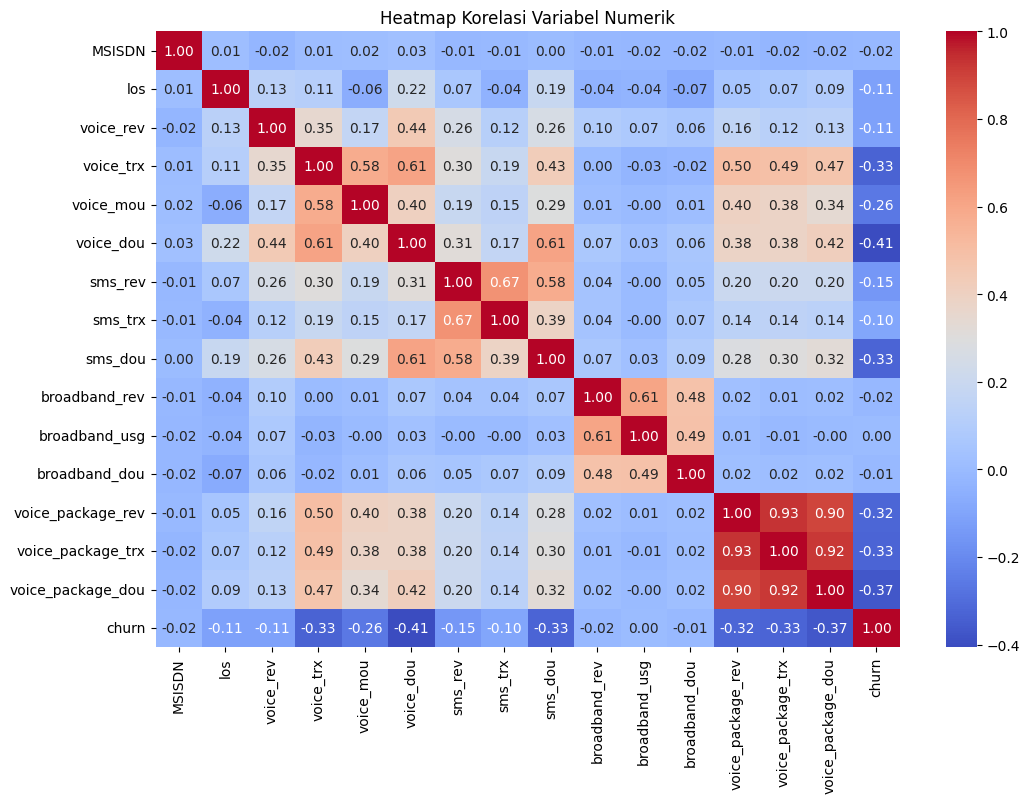

In [48]:
# Heatmap Korelasi
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

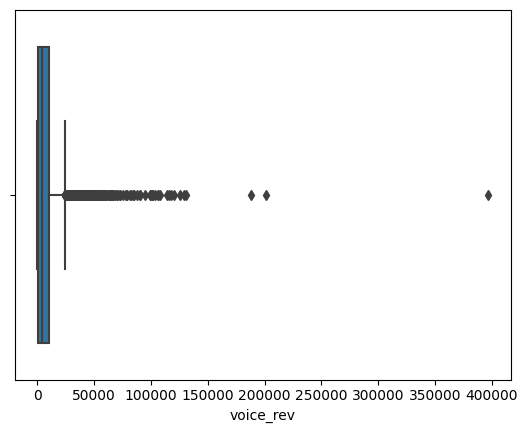

In [18]:
### 2 melihat outlier dalam data voice_rev untuk:
"""
voice rev dipilih karena mengandung data penghasilan dari jasa voice (bulan terakhir)
"""
sns.boxplot(x=data['voice_rev'])
plt.show()

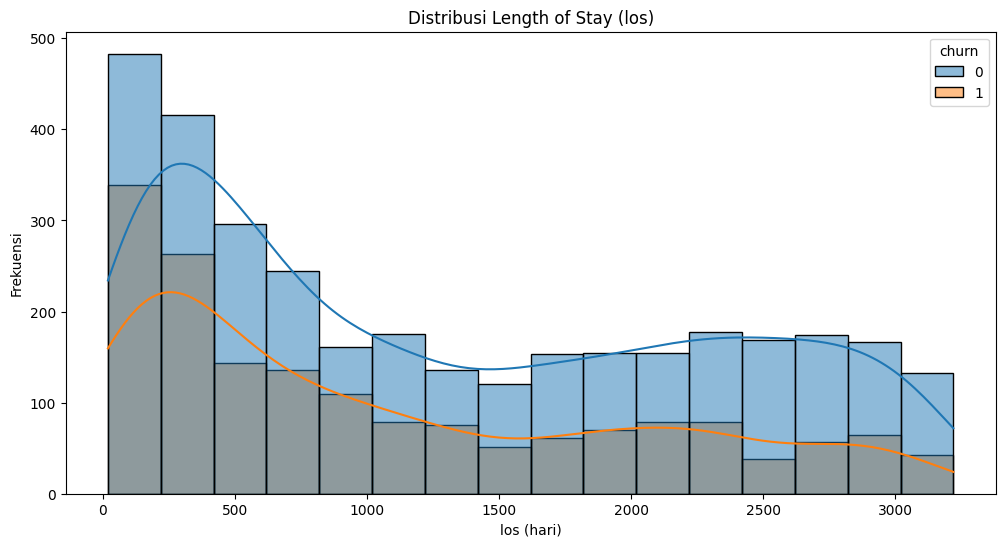

In [25]:
# Visualisasi Histogram antar kehilangan (lenght of stay)
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='los', hue='churn', kde=True)
plt.title('Distribusi Length of Stay (los)')
plt.xlabel('los (hari)')
plt.ylabel('Frekuensi')
plt.show()

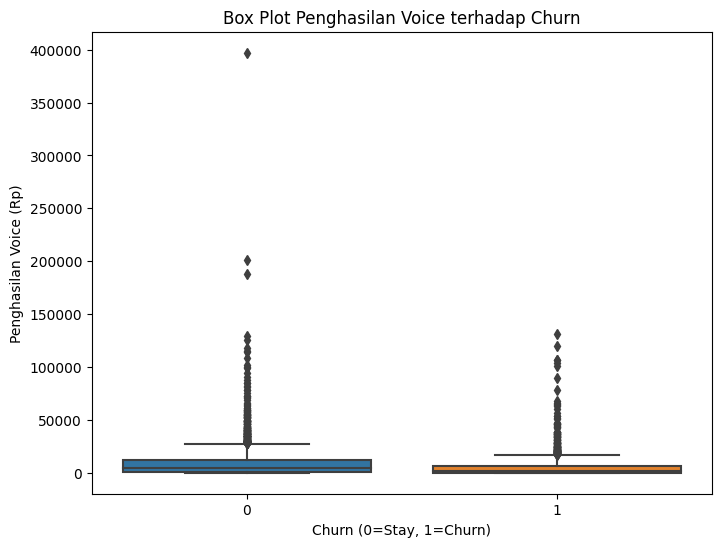

In [22]:
#boxplot churn dan penghasilan
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='churn', y='voice_rev')
plt.title('Box Plot Penghasilan Voice terhadap Churn')
plt.xlabel('Churn (0=Stay, 1=Churn)')
plt.ylabel('Penghasilan Voice (Rp)')
plt.show()

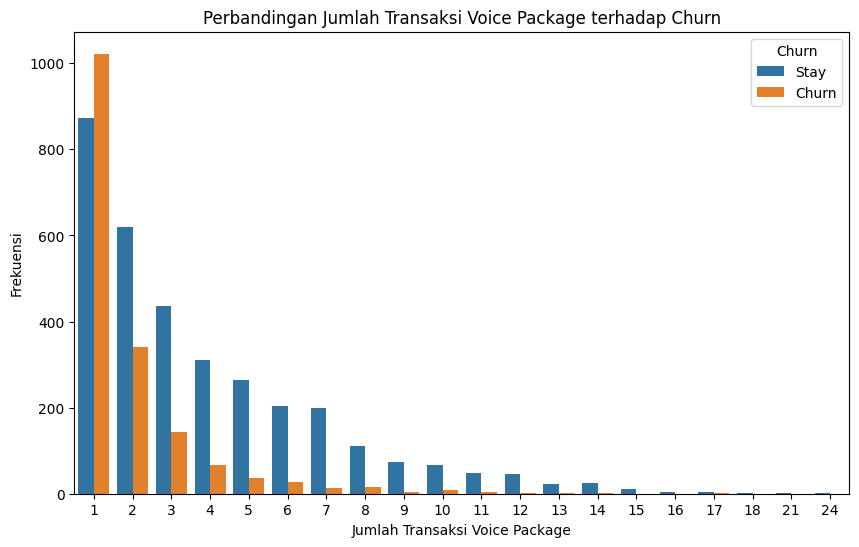

In [21]:
# Visualisasi Grafik Batang
"""
1. untuk melihat korelasi antara Voice Package terhadap Frekuensi
"""
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='voice_package_trx', hue='churn')
plt.title('Perbandingan Jumlah Transaksi Voice Package terhadap Churn')
plt.xlabel('Jumlah Transaksi Voice Package')
plt.ylabel('Frekuensi')
plt.legend(title='Churn', loc='upper right', labels=['Stay', 'Churn'])
plt.show()

In [32]:
####3 numeric_columns for variable
numeric_columns = ['los', 'voice_rev', 'voice_trx', 'voice_mou', 'voice_dou', 'sms_rev', 'sms_trx', 'sms_dou', 'broadband_rev', 'broadband_usg', 'broadband_dou', 'voice_package_rev', 'voice_package_trx', 'voice_package_dou','churn']

#menghitung t-test
for column in numeric_columns:
    t_stat, p_value = stats.ttest_ind(churn_data[column], stay_data[column])
    print(f"Variabel {column}: t-statistic = {t_stat}, p-value = {p_value}")

Variabel los: t-statistic = -7.849824728158594, p-value = 5.060491258026208e-15
Variabel voice_rev: t-statistic = -7.807973466186249, p-value = 7.0305351494335175e-15
Variabel voice_trx: t-statistic = -24.864671119515148, p-value = 9.032349465911806e-129
Variabel voice_mou: t-statistic = -19.18912678886829, p-value = 3.040345047922439e-79
Variabel voice_dou: t-statistic = -31.433381892755385, p-value = 4.5711490085091134e-198
Variabel sms_rev: t-statistic = -10.760642459788876, p-value = 1.0337880633415483e-26
Variabel sms_trx: t-statistic = -6.840161417431028, p-value = 8.86060144959075e-12
Variabel sms_dou: t-statistic = -24.504377865362155, p-value = 2.536090535775924e-125
Variabel broadband_rev: t-statistic = -1.0732793340748488, p-value = 0.2831976205928398
Variabel broadband_usg: t-statistic = 0.26297543475229684, p-value = 0.792580352690608
Variabel broadband_dou: t-statistic = -0.7010372668720921, p-value = 0.48331239461485953
Variabel voice_package_rev: t-statistic = -23.83177

c:\Users\anon\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


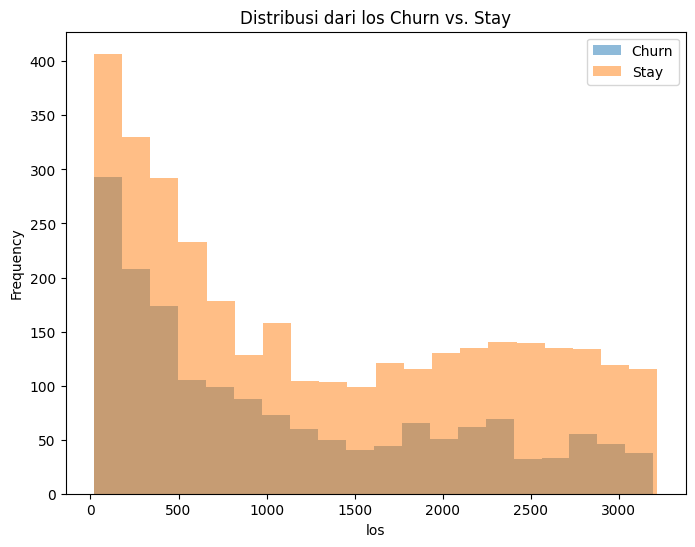

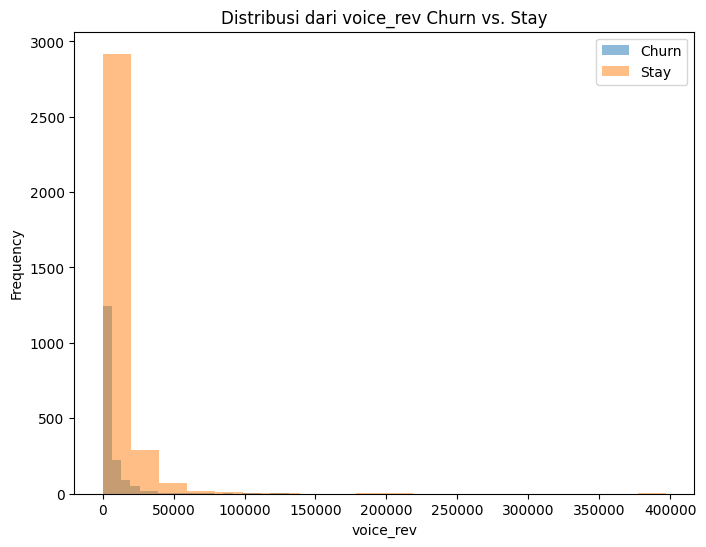

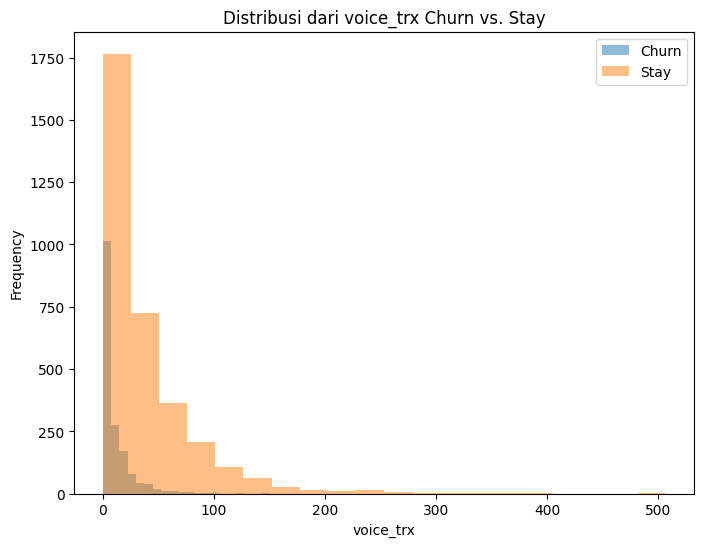

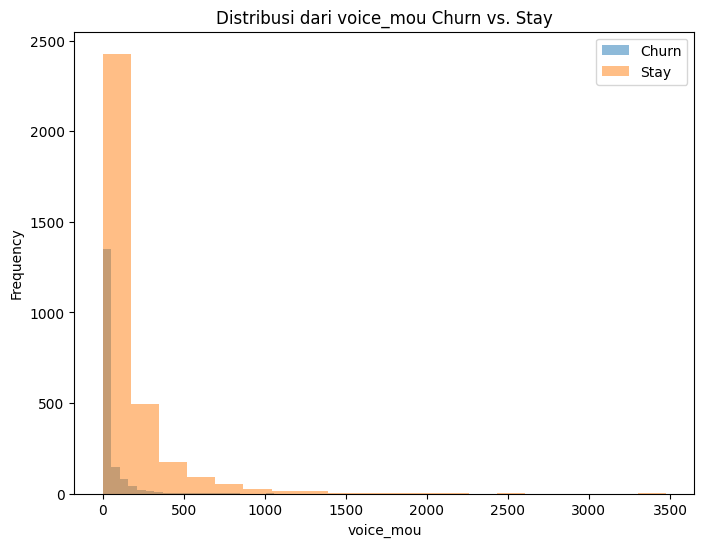

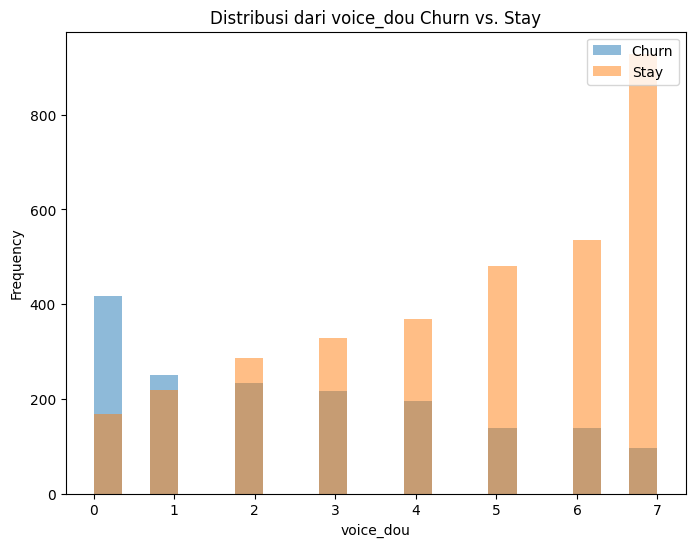

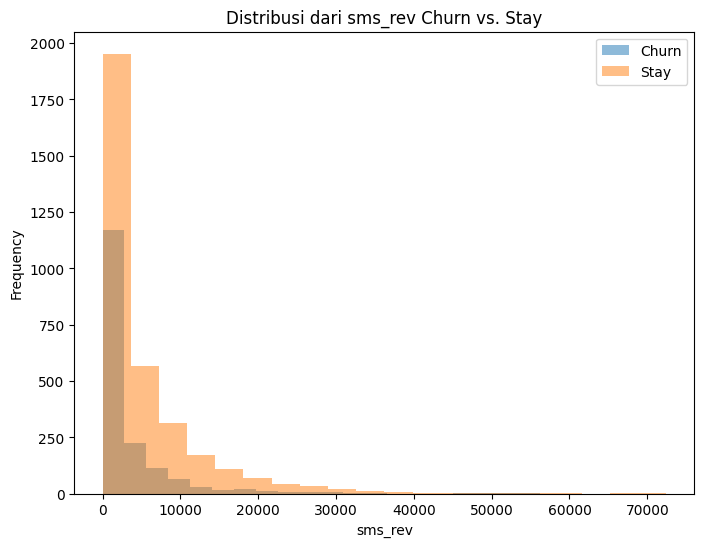

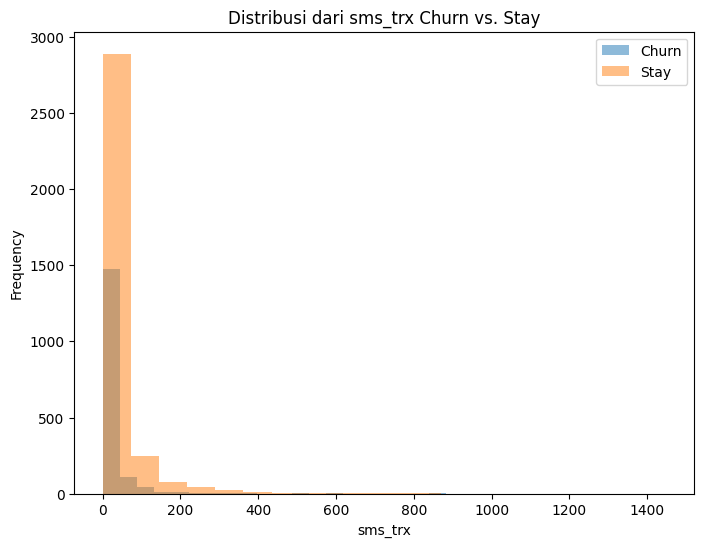

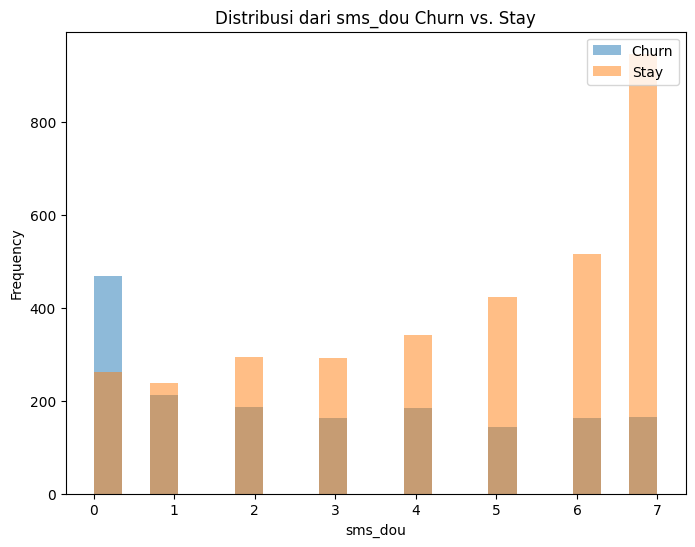

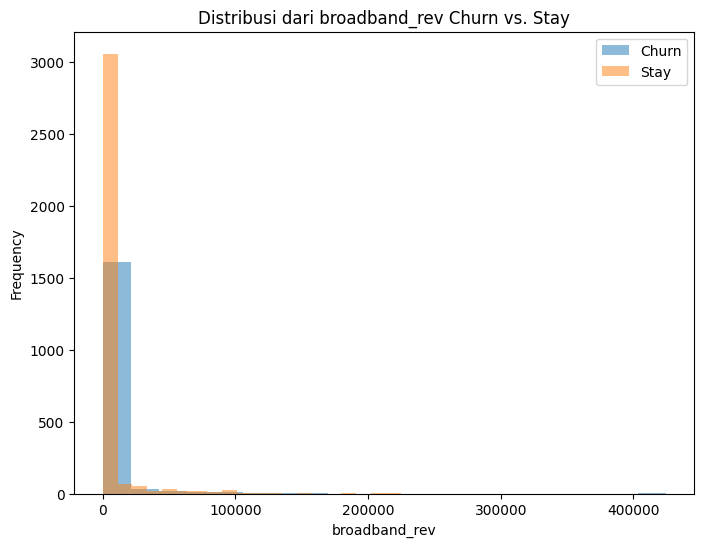

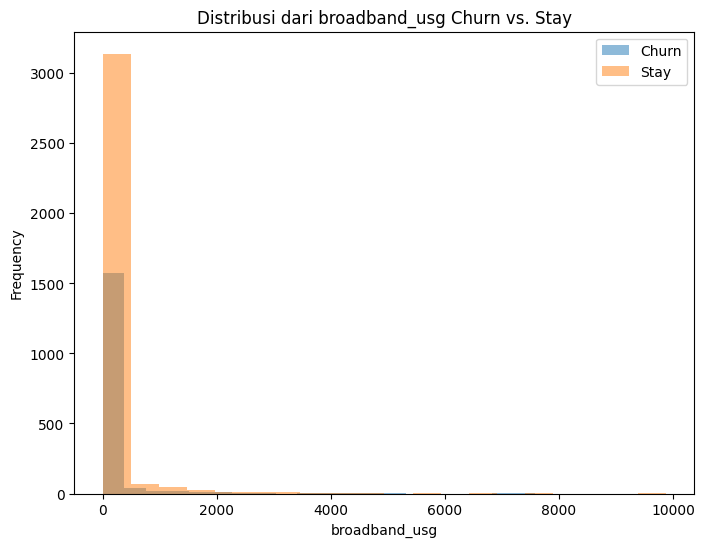

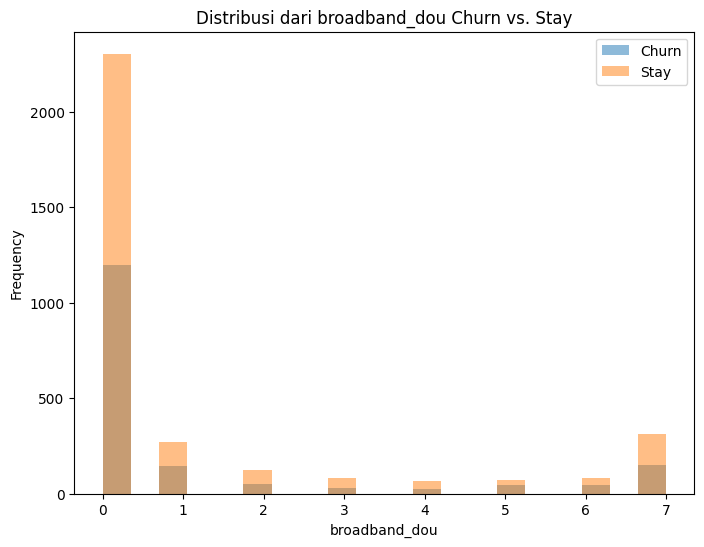

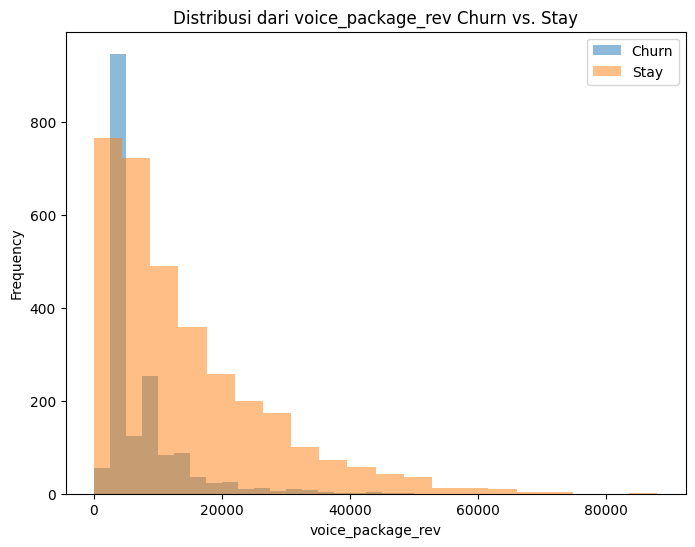

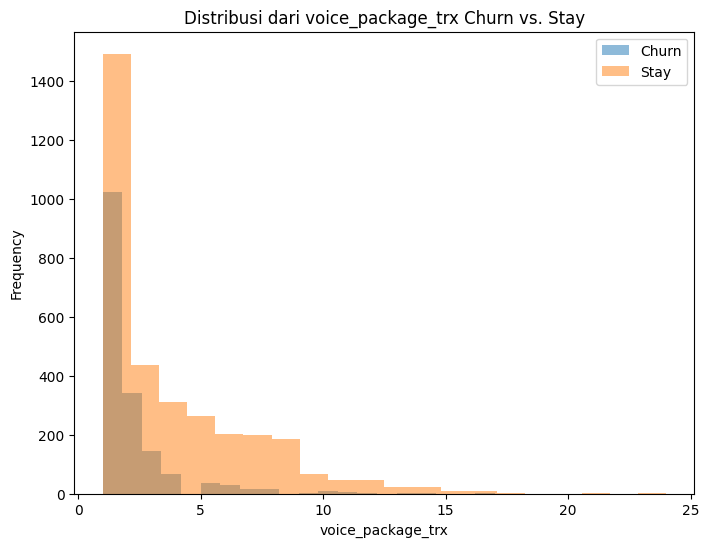

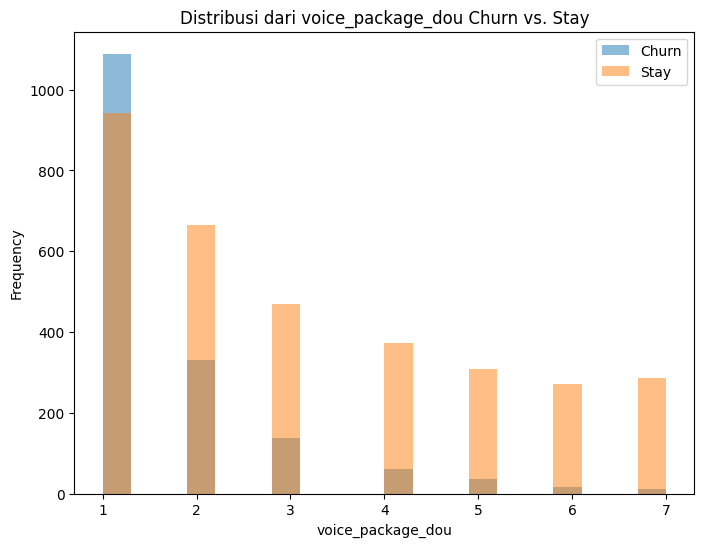

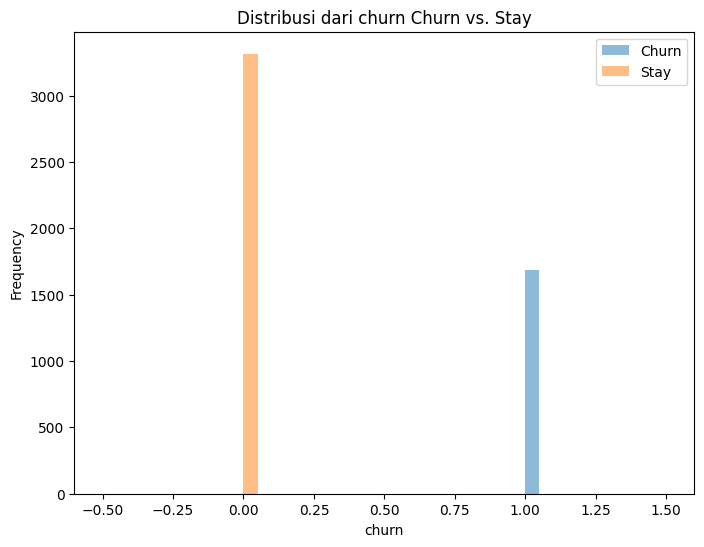

In [49]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(churn_data[column], bins=20, alpha=0.5, label='Churn')
    plt.hist(stay_data[column], bins=20, alpha=0.5, label='Stay')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.title(f'Distribusi dari {column} Churn vs. Stay')
    plt.show()

churn                0     1
voice_package_trx           
1                  873  1022
2                  620   340
3                  436   144
4                  310    66
5                  264    37
6                  203    28
7                  199    14
8                  112    15
9                   73     3
10                  66     8
11                  47     4
12                  45     1
13                  22     1
14                  24     1
15                  10     0
16                   4     0
17                   4     1
18                   1     0
21                   1     0
24                   1     0


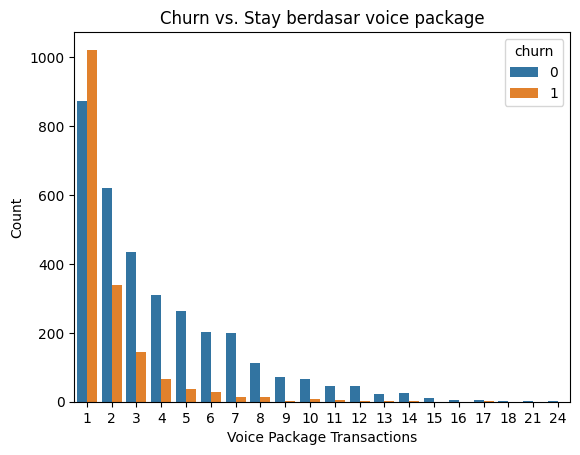

In [38]:
# perbedaan signifikan pelanggan yang churn dan stay
contingency_table = pd.crosstab(data['voice_package_trx'], data['churn'])
print(contingency_table)

# Atau menggunakan grafik batang
import seaborn as sns

sns.countplot(x='voice_package_trx', hue='churn', data=data)
plt.xlabel('Voice Package Transactions')
plt.ylabel('Count')
plt.title('Churn vs. Stay berdasar voice package')
plt.show()


In [40]:
###model prediksi churn
X = data.drop('churn', axis=1)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Skalakan fitur-fitur numerik jika diperlukan (misalnya, menggunakan StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
model = LogisticRegression()

# Latih model pada data pelatihan
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(f"Confusion Matrix:\n{confusion}")


Accuracy: 0.752
Precision: 0.6319218241042345
Recall: 0.5896656534954408
F1 Score: 0.6100628930817609
AUC-ROC: 0.7106301441843821
Confusion Matrix:
[[558 113]
 [135 194]]


In [53]:
X = data[['voice_mou']] 
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R^2): {r2}')

# Menampilkan koefisien (intersep dan gradien) model
print(f'Intercept (b): {model.intercept_}')
print(f'Coefficient (m): {model.coef_}')

Mean Squared Error (MSE): 0.1995736858049471
Coefficient of Determination (R^2): 0.08584947596627313
Intercept (b): 0.4054273010687528
Coefficient (m): [-0.00055473]
